In [95]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
# from linearmodels.panel.data import PanelData
# from linearmodels.panel import PanelOLS, PooledOLS, RandomEffects, compare
import matplotlib.pyplot as plt
import pyblp

In [96]:
save=0
product_data=pd.read_csv("../../data/merged/len3_ndb_blp_imputed_lags.csv",encoding="shift-jis",index_col=0)
product_data=product_data[product_data["year"]>2014]
product_data["market_ids"]=product_data["薬効分類"].astype(int).astype(str)+"-"+product_data["year"].astype(int).astype(str)
product_data["generic_share_q"].fillna(0,inplace=True)
product_data["generic_share_r"].fillna(0,inplace=True)
product_data["lag_sum_quantity"]=np.log(product_data["lag_sum_quantity"]+0.001)
product_data["otc_dom"]=np.log(product_data["otc_dom"]+0.001)
product_data.rename(columns={"薬価":"prices","q_share":"shares",
                    "lag_mean_price":"demand_instruments0",
                    "lag_sum_quantity":"demand_instruments1",
                    "lag_generic_share_q":"demand_instruments2",
                    },inplace=True)
product_data=product_data.loc[product_data["shares"]>0]
# data["shares"]=data["r_share"]
product_data.head()

,薬効分類,薬効分類名称,医薬品コード,医薬品名,薬価基準収載医薬品コード,prices,後発品区分,総計,year,in_hospital,...,id_449.0,id_625.0,id_629.0,id_799.0,shares,r_share,generic_share_q,generic_share_r,y_sq,market_ids
1350,114.0,解熱鎮痛消炎剤,620007096.0,ボルタレン錠２５ｍｇ,1147002F1560,13.1,0.0,45728285.84,2015.0,1,...,0.0,0.0,0.0,0.0,0.011810,0.003594,0.296205,0.073029,4060225.0,114-2015
1351,114.0,解熱鎮痛消炎剤,620007095.0,ボルタレンＳＲカプセル３７．５ｍｇ,1147002N1174,23.2,0.0,24202887.10,2015.0,1,...,0.0,0.0,0.0,0.0,0.006251,0.003369,0.296205,0.073029,4060225.0,114-2015
1352,114.0,解熱鎮痛消炎剤,621212601.0,ジクロフェナクＮａ徐放カプセル３７．５ｍｇ「トーワ」,1147002N1190,7.6,1.0,12257154.00,2015.0,1,...,0.0,0.0,0.0,0.0,0.003166,0.000559,0.296205,0.073029,4060225.0,114-2015
1353,114.0,解熱鎮痛消炎剤,620079315.0,ジクロフェナクＮａ錠２５ｍｇ「トーワ」,1147002F1625,5.6,1.0,11395427.80,2015.0,1,...,0.0,0.0,0.0,0.0,0.002943,0.000383,0.296205,0.073029,4060225.0,114-2015
1354,114.0,解熱鎮痛消炎剤,620079305.0,ジクロフェナクＮａ錠２５ｍｇ「サワイ」,1147002F1650,5.6,1.0,10321178.76,2015.0,1,...,0.0,0.0,0.0,0.0,0.002666,0.000347,0.296205,0.073029,4060225.0,114-2015


In [97]:
# demand_instruments=pyblp.build_blp_instruments(formulation="pricesoral+in_hospital+後発品区分",product_data=product_data)
# demand_instruments

In [98]:
# product_data["demand_instruments12"].isna().sum()
# product_data["lag_sum_quantity"].isna().sum()

In [99]:
logit_formulation = pyblp.Formulation('prices+oral+in_hospital+後発品区分', absorb='C(薬効分類)+C(year)')
logit_formulation

prices + oral + in_hospital + 後発品区分 + Absorb[C(薬効分類)] + Absorb[C(year)]

In [100]:
# product_data["shares"]-=1e-10
problem = pyblp.Problem(logit_formulation, product_data)
problem

Initializing the problem ...
Absorbing demand-side fixed effects ...
Initialized the problem after 00:00:00.

Dimensions:
 T     N     K1    MD    ED 
---  -----  ----  ----  ----
175  24448   4     5     2  

Formulations:
     Column Indices:          0      1         2         3  
--------------------------  ------  ----  -----------  -----
X1: Linear Characteristics  prices  oral  in_hospital  後発品区分


Dimensions:
 T     N     K1    MD    ED 
---  -----  ----  ----  ----
175  24448   4     5     2  

Formulations:
     Column Indices:          0      1         2         3  
--------------------------  ------  ----  -----------  -----
X1: Linear Characteristics  prices  oral  in_hospital  後発品区分

In [101]:
logit_results = problem.solve()
logit_results

Solving the problem ...
Updating the weighting matrix ...
Computed results after 00:00:00.

Problem Results Summary:
GMM     Objective    Clipped  Weighting Matrix
Step      Value      Shares   Condition Number
----  -------------  -------  ----------------
 1    +3.115418E+00     0      +2.798050E+06  

Estimating standard errors ...
Computed results after 00:00:00.

Problem Results Summary:
GMM     Objective    Clipped  Weighting Matrix  Covariance Matrix
Step      Value      Shares   Condition Number  Condition Number 
----  -------------  -------  ----------------  -----------------
 2    +8.317372E-02     0      +1.232758E+07      +6.450829E+07  

Cumulative Statistics:
Computation   Objective 
   Time      Evaluations
-----------  -----------
 00:00:00         2     

Beta Estimates (Robust SEs in Parentheses):
    prices            oral          in_hospital         後発品区分     
---------------  ---------------  ---------------  ---------------
 -7.785041E-04    +2.607196E+00    +4

Problem Results Summary:
GMM     Objective    Clipped  Weighting Matrix  Covariance Matrix
Step      Value      Shares   Condition Number  Condition Number 
----  -------------  -------  ----------------  -----------------
 2    +8.317372E-02     0      +1.232758E+07      +6.450829E+07  

Cumulative Statistics:
Computation   Objective 
   Time      Evaluations
-----------  -----------
 00:00:00         2     

Beta Estimates (Robust SEs in Parentheses):
    prices            oral          in_hospital         後発品区分     
---------------  ---------------  ---------------  ---------------
 -7.785041E-04    +2.607196E+00    +4.870128E-01    -1.232588E+00 
(+8.765980E-04)  (+6.699005E-02)  (+2.916913E-02)  (+4.835526E-01)

In [102]:
import datetime

# Get the current date and time
current_time = datetime.datetime.now()

# Format the time as a string
time_string = current_time.strftime("%Y-%m-%d_%H-%M-%S")
if save:
    logit_results.to_pickle(f"./results/MNL_len3_{time_string}.pkl")

In [103]:
# how to load pickle
# import pickle
# with open("./results/logit_blp_len3.pkl", "rb") as f:
#     example = pickle.load(f)
# example

In [104]:
elasticities = logit_results.compute_elasticities()

Computing elasticities with respect to prices ...
Finished after 00:00:00.



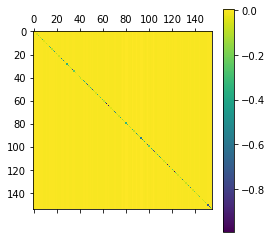

In [105]:
%matplotlib inline
import matplotlib.pyplot as plt
single_market = product_data['market_ids'] == '131-2015'
K=sum(single_market)
plt.colorbar(plt.matshow(elasticities[single_market][:,:K]))

In [106]:
elasticities[single_market][:,:K]

array([[-3.50241286e-02,  1.70926806e-04,  8.42341765e-04, ...,
         8.89817069e-04,  3.92754557e-04,  6.42333341e-05],
       [ 7.09209005e-04, -3.55624108e-02,  8.42341765e-04, ...,
         8.89817069e-04,  3.92754557e-04,  6.42333341e-05],
       [ 7.09209005e-04,  1.70926806e-04, -2.02551190e-02, ...,
         8.89817069e-04,  3.92754557e-04,  6.42333341e-05],
       ...,
       [ 7.09209005e-04,  1.70926806e-04,  8.42341765e-04, ...,
        -8.24324516e-01,  3.92754557e-04,  6.42333341e-05],
       [ 7.09209005e-04,  1.70926806e-04,  8.42341765e-04, ...,
         8.89817069e-04, -3.75546869e-01,  6.42333341e-05],
       [ 7.09209005e-04,  1.70926806e-04,  8.42341765e-04, ...,
         8.89817069e-04,  3.92754557e-04, -6.59529133e-02]])

Computing diversion ratios with respect to prices ...
Finished after 00:00:00.



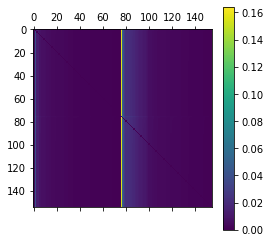

In [107]:
diversions = logit_results.compute_diversion_ratios()
plt.colorbar(plt.matshow(diversions[single_market][:,:K]))